# Import các thư viện cần thiết

In [ ]:
!pip install country_converter

In [ ]:

# Data
import numpy as np
import pandas as pd
import country_converter as coco



# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud


# Xử lý ngôn ngữ tự nhiên : NLTK ( Nature Language Toolkit )
import nltk




# Styling
%matplotlib inline
sns.set_theme(style = 'dark')
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
plt.style.use('dark_background')







In [ ]:
# Đọc và xem qua dữ liệu


df = pd.read_csv('https://raw.githubusercontent.com/vietanh926/-n/main/ds_salaries.csv')
df.drop(df[['salary','salary_currency','Unnamed: 0']],axis=1, inplace=True)

print(df.shape)
df.tail(15)

(607, 9)


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
592,2022,SE,FT,Data Scientist,230000,US,100,US,M
593,2022,SE,FT,Data Scientist,150000,US,100,US,M
594,2022,SE,FT,Data Analytics Manager,150260,US,100,US,M
595,2022,SE,FT,Data Analytics Manager,109280,US,100,US,M
596,2022,SE,FT,Data Scientist,210000,US,100,US,M
597,2022,SE,FT,Data Analyst,170000,US,100,US,M
598,2022,MI,FT,Data Scientist,160000,US,100,US,M
599,2022,MI,FT,Data Scientist,130000,US,100,US,M
600,2022,EN,FT,Data Analyst,67000,CA,0,CA,M
601,2022,EN,FT,Data Analyst,52000,CA,0,CA,M


Text(0.5, 1.0, 'Bảng phân phối các giá trị cột')

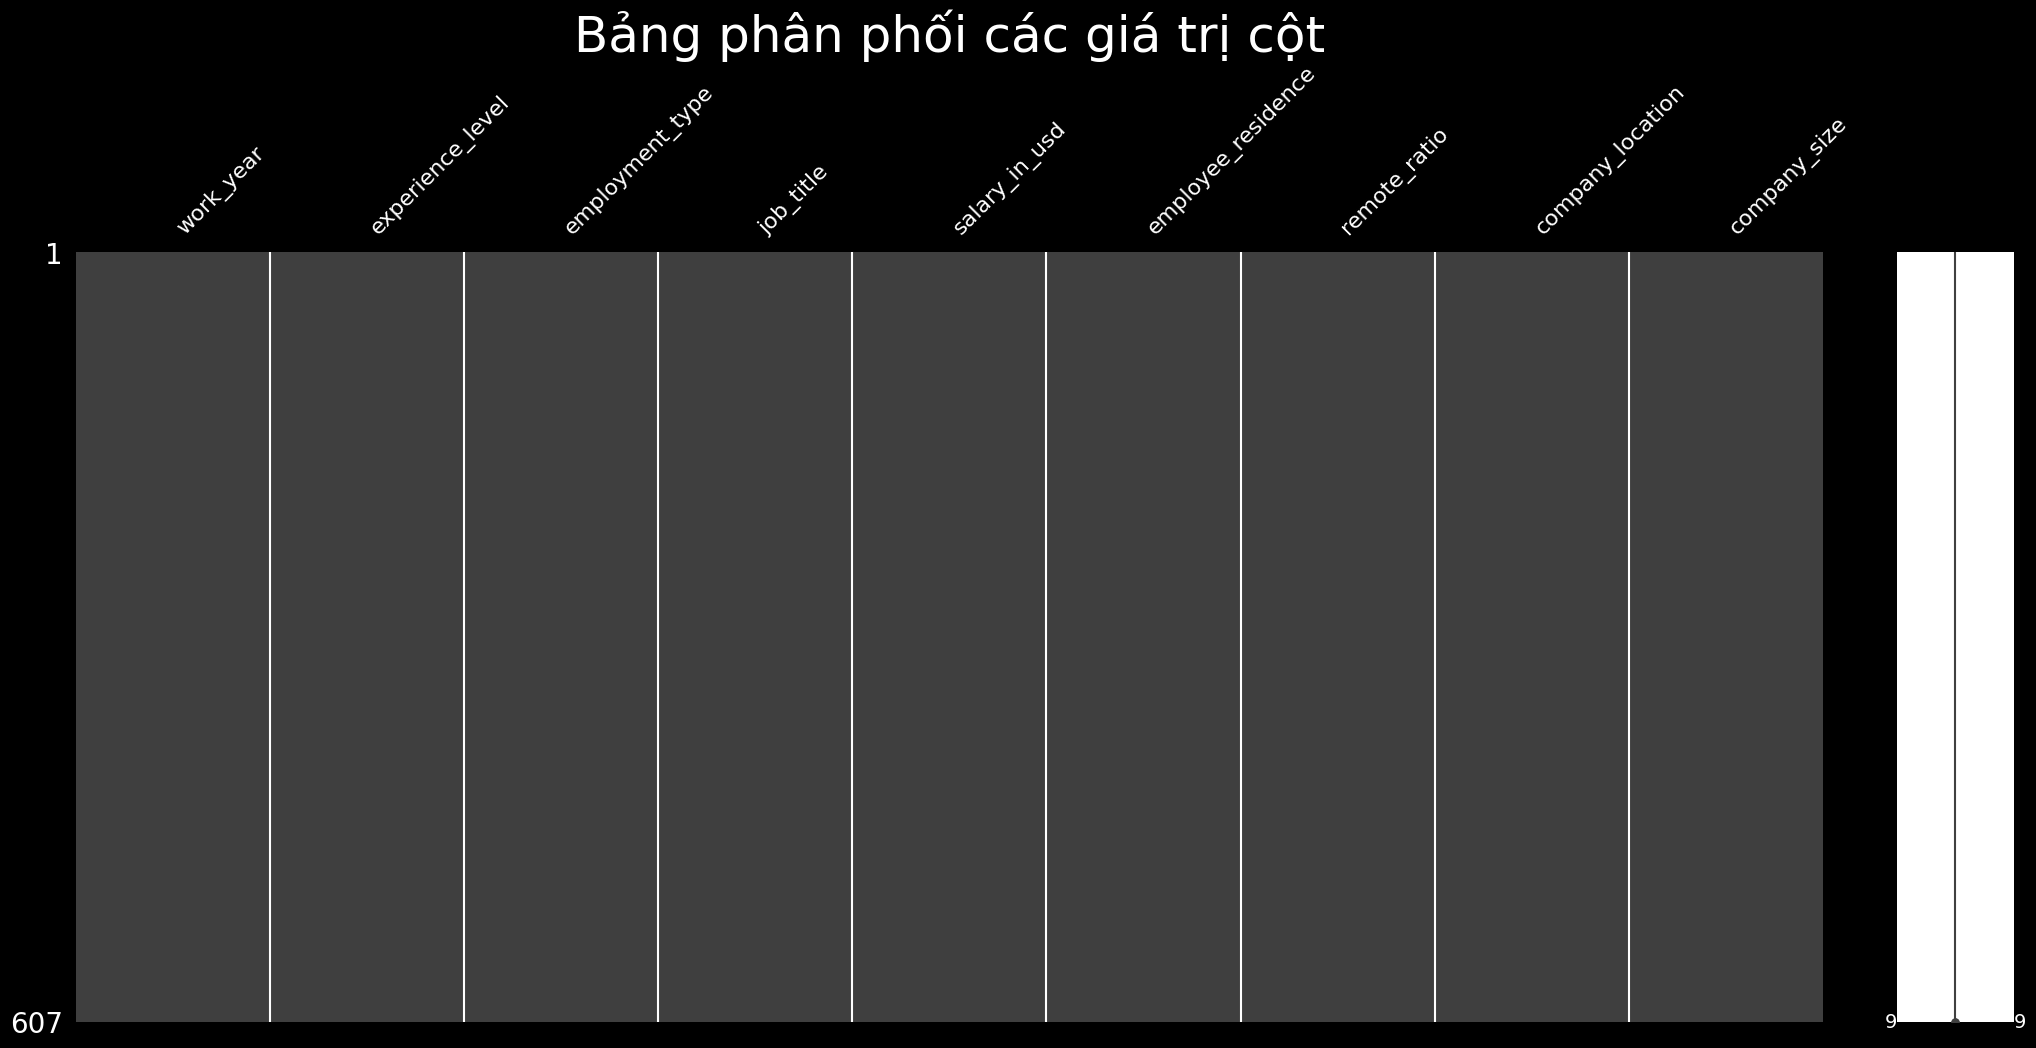

In [ ]:
msno.matrix(df)
plt.title('Bảng phân phối các giá trị cột', fontsize = 36)


# Trực quan các cột

#### Cột Experience level

Text(0.5, 1.0, 'Phần trăm yêu cầu mức độ kỹ năng trong công việc')

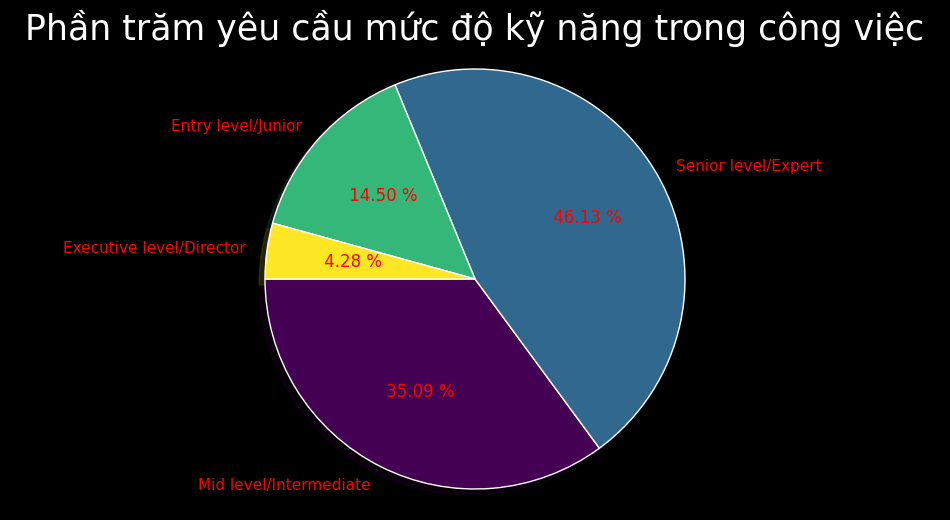

In [ ]:
from collections import Counter


#Thay các cột
df['experience_level'] = df['experience_level'].replace('EN','Entry level/Junior')
df['experience_level'] = df['experience_level'].replace('MI','Mid level/Intermediate')
df['experience_level'] = df['experience_level'].replace('SE','Senior level/Expert')
df['experience_level'] = df['experience_level'].replace('EX','Executive level/Director')


ex_level = df['experience_level'].values
count = Counter(ex_level)

label = count.keys()
n_count = count.values()
explode = [0,0,0,0]




fig, ax = plt.subplots(figsize = (12,6))
ax.pie(
       n_count , explode = explode , labels = label ,
       autopct ='% 1.2f %%',shadow = True , startangle = 180,
       textprops = {"color":"red"} , colors = plt.cm.viridis(np.linspace(0,1,len(label)))
      )



ax.axis('equal')
ax.set_title('Phần trăm yêu cầu mức độ kỹ năng trong công việc', size = 25, fontname = "Times New Roman")



Phần lớn các công ty sẽ tuyển Senior level , executive level sẽ rất ít được tuyển trong các ngành data

### Cột Job Title

In [ ]:
from collections import namedtuple


# Đếm số lượng job liên quan đến ngành Data Science
print("Số công việc trong cơ sở dữ liệu là : ", df['job_title'].value_counts().size)

Số công việc trong cơ sở dữ liệu là :  50


In [ ]:
jobs = df['job_title'].value_counts()[:50]


# Tạo một bản đồ màu rời rạc
color_map = {job: color for job, color in zip(jobs.index, px.colors.sequential.PuBuGn)}

fig = px.bar(jobs, x=jobs.index, y=jobs.values,
             color=jobs.index, color_discrete_map=color_map,
             text=jobs.values, title='Công việc dựa trên bộ dữ liệu 2020 - 2022',
             template="plotly_dark")

fig.update_layout(
    xaxis_title = "Job Title",
    yaxis_title = "Count",
    font = dict(family = "Times New Roman" , size = 12))

fig.show()


Ngành Data Scientist và Data Engineer là 2 ngành có nhiều nhu cầu tuyển dụng trong năm 2020-2022 nhất


### Cột employment type

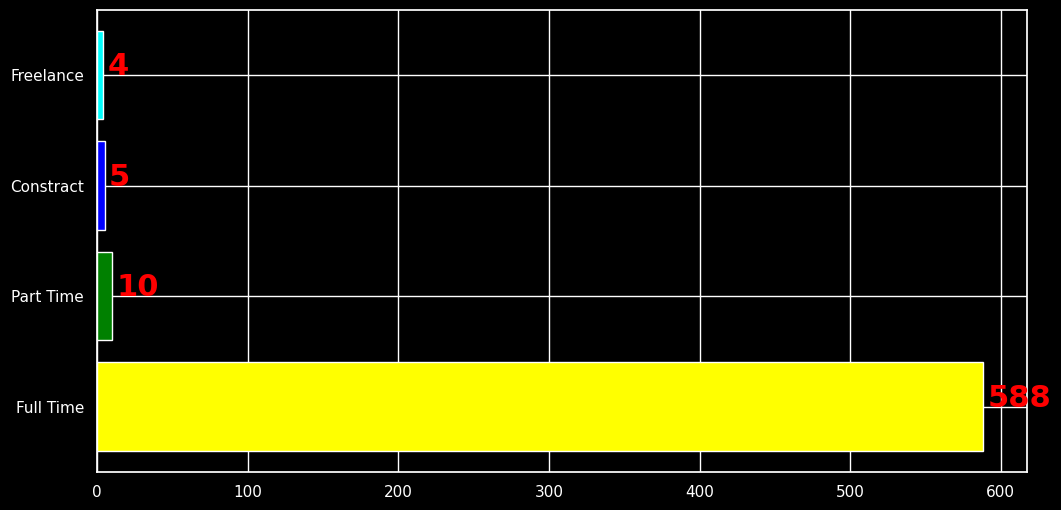

In [ ]:
df['employment_type'] = df['employment_type'].replace('FT','Full Time')
df['employment_type'] = df['employment_type'].replace('PT','Part Time')
df['employment_type'] = df['employment_type'].replace('CT','Constract')
df['employment_type'] = df['employment_type'].replace('FL','Freelance')




employment_data = df['employment_type'].value_counts().values
employment_index = df['employment_type'].value_counts().index




colors = ['yellow','green','blue','cyan']




fig,ax = plt.subplots(figsize = (12,6))
ax.barh(employment_index,employment_data , color = colors )
ax.grid('on')

for i ,v in enumerate(employment_data):
    ax.text(v + 3, i, str(v),
            color = 'red',
            fontweight = 'bold',
            size = 22)




Phần lớn là làm việc Full Time còn lại thì làm việc Freelance

###  Cột Employee residence và Company Location

#### Cột Employee residence

In [ ]:
#Chuyển đổi mã quốc gia theo chuẩn ISO3
converted_country = coco.convert(names=df['employee_residence'], to="ISO3")

df['employee_residence'] = converted_country
resident = df['employee_residence'].value_counts()


location = resident.index
colors = resident.values


fig = px.choropleth(locations = location ,
                    color = colors ,
                    color_continuous_scale=px.colors.sequential.Plasma
                   )
fig.show()





Các nhân lực tập trung phần lớn là ở Mỹ

#### Top 10  resident

In [ ]:
top10_employee_location = resident[:10]
fig = px.bar(y=top10_employee_location.values,
             x=top10_employee_location.index,
             color = top10_employee_location.index,
             color_discrete_sequence=px.colors.sequential.deep,
             text=top10_employee_location.values,
             title= 'Top 10 Location of Employee',
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Location of Employee",
    yaxis_title="count",
    font = dict(size=17,family="Times New Roman"))
fig.show()

#### Cột company location

In [ ]:
converted_company_location = coco.convert(names=df['company_location'], to="ISO3")

df['company_location'] = converted_company_location
converted_company_location = df['company_location'].value_counts()


company_location = converted_company_location.index
color = converted_company_location.values


fig = px.choropleth(locations = company_location ,
                    color = color ,
                    color_continuous_scale=px.colors.sequential.YlGn,
                    #template = 'plotly_dark'
                   )
fig.show()


Phần lớn trụ sở công ty ở Mỹ

#### Kết hợp cột company location và employee location

In [ ]:
converted_country = coco.convert(names = df['company_location'], to = 'ISO3')

df['company_location'] = converted_country

c_location = df['company_location'].value_counts()
top_10_company_location = c_location[:10]



fig = go.Figure(
                data =
                [ go.Bar(name = 'Employee Location' , x = top10_employee_location.index , y =  top10_employee_location.values , marker_color = 'crimson') ,
                  go.Bar(name = 'Company Location' , x = top_10_company_location.index , y = top_10_company_location.values , marker_color = 'white') ]
               )
fig.update_layout( barmode = 'group' , xaxis_tickangle = -45 , title = 'Tổng hợp cột Employee Location và cột Company Location' ,
                   template = 'plotly_dark' , font = dict(size = 18, family = "Times New Roman"))

fig.show()



#### Cột Company size

In [ ]:
grouped_size = df['company_size'].value_counts()

fig = px.bar(y=grouped_size.values,
             x=grouped_size.index,
             color = grouped_size.index,
             color_discrete_sequence=px.colors.sequential.dense,
             text=grouped_size.values,
             title= 'Phân bố của Company Size',
             template= 'plotly_dark')

fig.update_traces(width=0.4)
fig.update_layout(
    xaxis_title="Company Size",
    yaxis_title="count",
    font = dict(size=17,family="Times New Roman"))
fig.show()


Company size Medium chiếm đa số , và chiếm thứ hai là Large điều này cho thấy các công ty liên quan đến ngành Data thường sẽ là các công ty lớn

### Phân tích về Năm


### Phân tích về phương thực làm việc theo các năm

In [ ]:

remote_year = df.groupby(['work_year','remote_ratio']).size()
ratio_2020 = np.round(remote_year[2020].values/remote_year[2020].values.sum(),2)
ratio_2021 = np.round(remote_year[2021].values/remote_year[2021].values.sum(),2)
ratio_2022 = np.round(remote_year[2022].values/remote_year[2022].values.sum(),2)
fig = go.Figure()
categories = ['Làm việc trực tiếp', 'Làm việc nửa trực tiếp nửa từ xa', 'Làm việc hoàn toàn từ xa']
fig.add_trace(go.Scatterpolar(
             r = ratio_2020,
             theta = categories,
             fill = 'toself',
             name = 'Tỉ lệ về hình thức làm việc của năm 2020'
             ))
fig.add_trace(go.Scatterpolar(
             r = ratio_2021,
             theta = categories,
             fill = 'toself',
             name = 'Tỉ lệ về hình thức làm việc của năm 2021'
#              fillcolor = 'lightred'
             ))
fig.add_trace(go.Scatterpolar(
             r = ratio_2022,
             theta = categories,
             fill = 'toself',
             name = 'Tỉ lệ về hình thức làm việc của năm 2022'
#              fillcolor = 'lightblue'
             ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
#       visible=True,
      range=[0, 0.75]
    )),
  font = dict(family="Times New Roman", size=17),
  showlegend=True,
  title = 'Tỉ lệ các hình thức làm việc theo các năm'
)
fig.layout.template = 'plotly_dark'
fig.show()

Sự chuyển biến rõ rệt từ năm 2020 đến 2022 . Khi tất cả các ngành liên quan đến Data dần chuyển biến từ làm việc trực tiếp sang làm việc hoàn toàn từ xa - có thể một phần do sự xuất hiện của covid khiến các công ty thay đổi hình thức làm việc để duy trì kinh tế

# Phân tích cột kinh nghiệm

# Phân tích cấp độ kinh nghiệm và cột hình thức làm việc

In [ ]:


exlevel_type = df.groupby(['experience_level','employment_type']).size()



fig = go.Figure(data=[
    go.Bar(name='Entry level/Junior', x=exlevel_type['Entry level/Junior'].index, y=exlevel_type['Entry level/Junior'].values,
           text=exlevel_type['Entry level/Junior'].values, marker_color='white'),
    go.Bar(name='Executive level/Director', x=exlevel_type['Executive level/Director'].index, y=exlevel_type['Executive level/Director'].values,
           text=exlevel_type['Executive level/Director'].values, marker_color='red'),
    go.Bar(name='Mid level/Intermediate', x=exlevel_type['Mid level/Intermediate'].index, y=exlevel_type['Mid level/Intermediate'].values,
           text=exlevel_type['Mid level/Intermediate'].values, marker_color='yellow'),
    go.Bar(name='Senior level/Expert', x=exlevel_type['Senior level/Expert'].index, y=exlevel_type['Senior level/Expert'].values,
           text=exlevel_type['Senior level/Expert'].values, marker_color='blue'),
])




fig.update_layout(xaxis_tickangle=-45, title='Hình thức làm việc theo cấp độ kinh nghiệm ', font = dict(family="Times New Roman", size=17), template='plotly_dark')
fig.show()

### Phân tích cấp độ kinh nghiệm và các vị trí ứng tuyển trong ngành data

In [ ]:
exlevel_job = df.groupby(['experience_level','job_title']).size()
entry_top = exlevel_job['Entry level/Junior'].sort_values(ascending=False)[:50]
executive_top = exlevel_job['Executive level/Director'].sort_values(ascending=False)[:50]
mid_top = exlevel_job['Mid level/Intermediate'].sort_values(ascending=False)[:50]
senior_top = exlevel_job['Senior level/Expert'].sort_values(ascending=False)[:50]



exlevel_type = df.groupby(['experience_level','employment_type']).size()
fig = go.Figure(data=[
    go.Bar(name='Entry level/Junior', x=entry_top.index, y=entry_top.values,
           text=entry_top.values, marker_color='white'),
    go.Bar(name='Executive level/Director', x=executive_top.index, y=executive_top.values,
           text=executive_top.values, marker_color='red'),
    go.Bar(name='Mid level/Intermediate', x=mid_top.index, y=mid_top.values,
           text=mid_top.values, marker_color='yellow'),
    go.Bar(name='Senior level/Expert', x=senior_top.index, y=senior_top.values,
           text=senior_top.values, marker_color='blue'),
])






fig.update_layout(barmode = 'stack', xaxis_tickangle=-45, title='Cấp độ kinh nghiệp trong các ngành', font = dict(family="Times New Roman", size=15), template='plotly_dark')
fig.show()

Yêu cầu kinh nghiệm trong từng ngành cũng rất cao , đa số sẽ yêu cầu nhân lực có trình độ kinh nghiệm từ Senior level trở lên . Việc này cho thấy rằng các ngành data hiện sẽ rất khó khăn cho những người có cấp độ kinh nghiệm là Junior tức là gần như chưa có kinh nghiệm gì

## Phân tích kinh nghiệm và các công ty

In [ ]:
exlevel_size = df.groupby(['experience_level','company_size']).size()



fig = go.Figure(data=[
    go.Bar(name='Entry level/Junior', x=exlevel_size['Entry level/Junior'].index, y=exlevel_size['Entry level/Junior'].values,
           text=exlevel_size['Entry level/Junior'].values, marker_color='white'),
    go.Bar(name='Executive level/Director', x=exlevel_size['Executive level/Director'].index, y=exlevel_size['Executive level/Director'].values,
           text=exlevel_size['Executive level/Director'].values, marker_color='red'),
    go.Bar(name='Mid level/Intermediate', x=exlevel_size['Mid level/Intermediate'].index, y=exlevel_size['Mid level/Intermediate'].values,
           text=exlevel_size['Mid level/Intermediate'].values, marker_color='yellow'),
    go.Bar(name='Senior level/Expert', x=exlevel_size['Senior level/Expert'].index, y=exlevel_size['Senior level/Expert'].values,
           text=exlevel_size['Senior level/Expert'].values, marker_color='blue'),
])


fig.update_layout(xaxis_tickangle= 0, title='Cấp độ kinh nghiệm với các loại công ty',
                  font=dict(family="Times New Roman", size=17), template='plotly_dark')
fig.show()

# Phân tích về lương

## Cấp độ kinh nghiệm và mức lương

In [ ]:

exlevel_salary = df[['experience_level','salary_in_usd']]

entry_salary = exlevel_salary.loc[exlevel_salary['experience_level']=='Entry level/Junior']
executive_salary = exlevel_salary.loc[exlevel_salary['experience_level']=='Executive level/Director']
mid_salary = exlevel_salary.loc[exlevel_salary['experience_level']=='Mid level/Intermediate']
senior_salary = exlevel_salary.loc[exlevel_salary['experience_level']=='Senior level/Expert']

group_labels = ['Entry level/Junior','Mid level/Intermediate','Senior level/Expert','Executive level/Director']
colors = ['white','yellow','blue','red']

lst = [entry_salary['salary_in_usd'].mean(),
       mid_salary['salary_in_usd'].mean(),
       senior_salary['salary_in_usd'].mean(),
       executive_salary['salary_in_usd'].mean(),]



fig = go.Figure(data=px.bar(x= group_labels,
                            y=lst,
                            color = group_labels,
                            color_discrete_sequence= colors,
                            title='Trung bình mức lương của các cấp độ kinh nghiệm',
                            text = np.round([num/1000 for num in lst],2),
                            template = 'plotly_dark',
                            height=500))
fig.update_layout(
    xaxis_title="Cấp độ kinh nghiệm",
    yaxis_title="Trung bình mức lương",
    font = dict(size=17,family="Times New Roman"))

fig.show()

## Mức lương và công việc

In [ ]:
salary_job = df.groupby(['salary_in_usd','job_title']).size().reset_index()
salary_job = salary_job[-20:]



fig = px.bar(x=salary_job['job_title'],y=salary_job['salary_in_usd'],text = salary_job['salary_in_usd'],
                   color = salary_job['salary_in_usd'], color_discrete_sequence=px.colors.sequential.PuBu)


fig.update_layout(
    xaxis_title="Công việc",
    yaxis_title="Lương ")


fig.update_layout(barmode = 'relative',xaxis_tickangle=-45,
                  title='Top 20 Công việc có số tiền nhiều nhất', template='plotly_dark',
                  font = dict(size=17,family="Times New Roman"))

### Kinh nghiệm với mức lương theo từng năm

In [ ]:
px.scatter(df, x = 'salary_in_usd', y = 'experience_level', size = 'salary_in_usd', hover_name = 'job_title', color = 'job_title',
           color_discrete_sequence=px.colors.qualitative.Alphabet, template = 'plotly_dark',
           animation_frame = 'work_year', title = 'Experience level VS Salary').update_yaxes(categoryarray = ['Entry', 'Mid', 'Senior', 'Executive'])


In [ ]:
import matplotlib.cm as cm


df['Other'] = df.groupby(['work_year','job_title']).cumcount() + 1
df['Count'] = df.groupby('job_title').cumcount() + 1
print(df['Count'].head(15))
print(df['Other'].head(15))



#Tạo bảng màu sắc
color = cm.rainbow(np.linspace(0, 1, len(df['job_title'].unique())))
#Tạo Dict để ánh xạ từng công việc với một màu
color_dict = {job: color[i] for i, job in enumerate(df['job_title'].unique())}



# Tạo DataFrame mới với cột 'Other' và 'salary_in_usd'
df_plot = df[['Count', 'salary_in_usd', 'job_title']]

# Tạo biểu đồ scatter với Plotly
fig = px.scatter(df_plot, x='Count', y='salary_in_usd', color='job_title')


fig.show()


0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     2
8     1
9     1
10    3
11    4
12    5
13    1
14    2
Name: Count, dtype: int64
0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     2
8     1
9     1
10    3
11    4
12    5
13    1
14    2
Name: Other, dtype: int64


In [ ]:
# Tính số lượng 'job_title' trong mỗi 'work_year'
df['job_count'] = df.groupby(['work_year', 'job_title']).cumcount() + 1
df['total_jobs'] = df.groupby(['work_year', 'job_title'])['job_title'].transform('count')

# Tính 'normalized_year' bằng cách chia 'job_count' cho 'total_jobs' và cộng vào 'work_year'
df['normalized_year'] = df['work_year'] + (df['job_count'] / df['total_jobs'])

# Tạo DataFrame mới với cột 'normalized_year', 'salary_in_usd' và 'job_title'
df_plot = df[['normalized_year', 'salary_in_usd', 'job_title']]

# Tạo biểu đồ scatter với Plotly
fig = px.scatter(df_plot, x='normalized_year', y='salary_in_usd', color='job_title')


fig.show()


In [ ]:

# Tạo DataFrame mới với cột 'Other' và 'salary_in_usd'
df_plot = df[['Count', 'salary_in_usd', 'job_title']]

# Lấy danh sách các ngành
jobs = df['job_title'].unique()

# Tạo biểu đồ
fig = go.Figure()

# Vẽ đường cho mỗi ngành
for job in jobs:
    df_job = df_plot[df_plot['job_title'] == job]
    fig.add_trace(go.Scatter(x=df_job['Count'], y=df_job['salary_in_usd'], mode='lines+markers', name=job))

fig.show()


In [ ]:


# Tính số lượng 'job_title' trong mỗi 'work_year'
df['job_count'] = df.groupby(['work_year', 'job_title']).cumcount() + 1
df['total_jobs'] = df.groupby(['work_year', 'job_title'])['job_title'].transform('count')

# Tính 'normalized_year' bằng cách chia 'job_count' cho 'total_jobs' và cộng vào 'work_year'
df['normalized_year'] = df['work_year'] + (df['job_count'] / df['total_jobs'])

# Tạo DataFrame mới với cột 'normalized_year', 'salary_in_usd' và 'job_title'
df_plot = df[['normalized_year', 'salary_in_usd', 'job_title']]

# Lấy danh sách các ngành
jobs = df['job_title'].unique()

# Tạo biểu đồ
fig = go.Figure()

# Vẽ đường cho mỗi ngành
for job in jobs:
    df_job = df_plot[df_plot['job_title'] == job]
    fig.add_trace(go.Scatter(x=df_job['normalized_year'], y=df_job['salary_in_usd'], mode='lines+markers', name=job))

fig.show()


# Lựa chọn mô hình Machine Learning phù hợp

In [2]:


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier




In [ ]:
df['salary_range'] = df['salary_in_usd']
df.drop( ['Other' ,'Count','job_count' ,'total_jobs' ,'normalized_year'], axis = 1 ,inplace = True )
df_copy = df.copy()

In [ ]:
encoders = {}

for column in ['job_title','company_size','employment_type','remote_ratio']:
  le = LabelEncoder()
  df_copy[column]= le.fit_transform(df[column])
  encoders[column] = le

le = LabelEncoder()
df_copy['experience_level'] = le.fit_transform(df['experience_level'])
encoders['experience_level'] = le


x = df_copy[['job_title','salary_range','company_size','employment_type']]
y = df_copy['experience_level']


x_train ,x_test ,y_train ,y_test = train_test_split(x, y, test_size = 0.25)


ML = RandomForestClassifier(n_estimators = 100 , criterion = 'gini', max_depth = 4 ,min_samples_split = 20)
ML.fit(x_train, y_train)

print('Training Score: ', ML.score(x_train ,y_train))
print('Testing Score: ',ML.score(x_test ,y_test))



Training Score:  0.643956043956044
Testing Score:  0.5855263157894737


In [ ]:
# In ra tất cả các khóa trong từ điển 'encoders'
print(encoders.keys())
# Chuyển đổi đối tượng keys thành danh sách và in ra
print(list(encoders.values()))

# In ra các giá trị gốc và giá trị đã được mã hóa
for i, class_ in enumerate(encoders['employment_type'].classes_):
    print(f"Original: {class_}, Encoded: {i}")
for i, class_ in enumerate(encoders['job_title'].classes_):
    print(f"Original: {class_}, Encoded: {i}")
for i, class_ in enumerate(encoders['company_size'].classes_):
    print(f"Original: {class_}, Encoded: {i}")
for i,class_ in enumerate(encoders['remote_ratio'].classes_):
    print(f"Original:{class_}, Encoded: {i}")
for i,class_ in enumerate(encoders['experience_level'].classes_):
    print(f"Original:{class_}, Encoded: {i}")



dict_keys(['job_title', 'company_size', 'employment_type', 'remote_ratio', 'experience_level'])
[LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder()]
Original: Constract, Encoded: 0
Original: Freelance, Encoded: 1
Original: Full Time, Encoded: 2
Original: Part Time, Encoded: 3
Original: 3D Computer Vision Researcher, Encoded: 0
Original: AI Scientist, Encoded: 1
Original: Analytics Engineer, Encoded: 2
Original: Applied Data Scientist, Encoded: 3
Original: Applied Machine Learning Scientist, Encoded: 4
Original: BI Data Analyst, Encoded: 5
Original: Big Data Architect, Encoded: 6
Original: Big Data Engineer, Encoded: 7
Original: Business Data Analyst, Encoded: 8
Original: Cloud Data Engineer, Encoded: 9
Original: Computer Vision Engineer, Encoded: 10
Original: Computer Vision Software Engineer, Encoded: 11
Original: Data Analyst, Encoded: 12
Original: Data Analytics Engineer, Encoded: 13
Original: Data Analytics Lead, Encoded: 14
Original: Data Analytics Mana

In [ ]:
#Kiểm tra dự đoán
new_data = pd.DataFrame({
    'job_title' : ['AI Scientist'],
    'salary_range' : [200000],                 #Usd trong 1 năm
    'company_size': ['S'],
    'employment_type': ['Full Time']
})

for column in new_data.columns:
  if column in encoders:
    new_data[column] = encoders[column].transform(new_data[column])

# Dự đoán kết quả cho dữ liệu mới
predictions = ML.predict(new_data)



# Chuyển đổi kết quả dự đoán về dạng phân loại
predictions_labels = encoders['experience_level'].inverse_transform(predictions)

print('Predictions (labels): ', predictions_labels)

Predictions (labels):  ['Senior level/Expert']


Dự đoán ngành nghề phù hợp với cá nhân

In [ ]:
X = df_copy[['salary_range', 'company_size', 'employment_type', 'experience_level', 'remote_ratio']]
Y = df_copy['job_title']

X_train , X_test , Y_train , Y_test = train_test_split(X,Y , test_size = 0.3)

MachineLearning = RandomForestClassifier( n_estimators= 100 ,
                                          criterion = 'gini' ,
                                          max_depth = 5 , min_samples_split = 20 )


MachineLearning.fit(X_train, Y_train)


print('Training Score: ', MachineLearning.score(X_train, Y_train))
print('Testing Score: ', MachineLearning.score(X_test, Y_test))


Training Score:  0.4080188679245283
Testing Score:  0.28415300546448086


In [ ]:
test_data = ({
    'salary_range':[5000],
    'company_size':['S'],
    'employment_type':['Full Time'],
    'experience_level':['Entry level/Junior'],
    'remote_ratio':[50]
})
test_data = pd.DataFrame(test_data)

for column in test_data.columns:
  if column in encoders:
    test_data[column] = encoders[column].transform(test_data[column])

predictions = MachineLearning.predict(test_data)

# Chuyển đổi kết quả dự đoán về dạng phân loại
predictions_labels = encoders['job_title'].inverse_transform(predictions)

print('Predictions (labels): ', predictions_labels)

Predictions (labels):  ['Data Scientist']
